# <span style='background :#D6DBDF ' > **Topic: Stroke Prediction**

#### Overview
1. Purpose
2. Data and python packages importing
3. Data cleaning process
4. Exploratory Data Analysis (EDA)<br>
    4.1 Categories Data<br>
    4.2 Continuous data
5. Data Preprocessing (Encoding)<br>
    5.1 Binary Categories<br>
    5.2 Multicategory:  One-Hot encoding<br>
    5.3 Assign binany category and multi-category to new dataframe "df_preProcess"
6. Feature selection<br>
    6.1 Pearson Correlation<br>
    6.2 Final Dateset<br>
7. Splitting the dataset into the Training set (80%) and Test set (20%)
8. Feature Scaling with StandardScaler
9. Handling Imbalance data using SMOTE
10. Model Selection<br>
    10.1 K-Fold Cross Validation<br>
    10.2 Confusion matrix<br>
    10.3 Sammary Model Selection
11. Tuning the Models
    

# <font color="MidnightBlue">1. Purpose

To predict the 

# <font color="MidnightBlue">2. Data and Python packages importing

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
#Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [99]:
df = pd.read_csv("https://raw.githubusercontent.com/anyamanee/stroke_prediction/main/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bm,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# <font color="MidnightBlue">3. Data cleaning process

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bm                 4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [101]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bm                   201
smoking_status         0
stroke                 0
dtype: int64

   > จากข้อมูลทั้งหมดพบ 201 missing values ในคอลัมน์ 'bm'<br>
   > เราจึงดูรายละเอียดค่าทางสถิติของข้อมูลในคอลัมน์ 'bm' เพื่อเลือกวิธีจัดการกับ missing value

In [102]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bm,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


> จากตารางข้อมูลทางสถิติด้านบน ค่าเฉลี่ยน และค่ากลางของคอลัมน์ 'bm' มีค่าใกล้เคียงกันที่ 28.89 และ 28.01 ตามลำดับดังนั้น จึงอ้างอิงได้ข้อมูลในคอลัมน์ 'bm' มีการแจกแจงแบบปกติ เราจึงเลือกจัดการกับ missing value ด้วยค่าเฉลี่ย

In [103]:
df.bm.mean()

28.893236911794666

In [104]:
df_mod = df
df_mod['bm'] = df_mod['bm'].fillna(df.bm.mean())
df_mod.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bm                   0
smoking_status       0
stroke               0
dtype: int64

> จากรายละเอียดด้านบนไม่พบ missing value แล้ว<br>
> หากอ้างอิงจากตารางสถิติด้านบนในคอลัมน์ 'Age' พบว่าค่าน้อยที่สุดในคอลัมน์นั้นมีค่าน้อยกว่า 1

In [105]:
df_check = df_mod.age[df_mod.age <1]
print(f'number of rows where the age is less than one: {len(df_check)}')
print(f'% of rows where the age is less than one: {( len(df_check)/df_mod.shape[0] )*100:.2f}%')

number of rows where the age is less than one: 43
% of rows where the age is less than one: 0.84%


> พบข้อมูล 43 แถวที่มีค่าในคอลัมน์ 'Age' น้อยกว่า 1 หรือคิดเป็นเพียง 0.84% จากข้อมูลทั้งหมดเท่านั้น ดังนั้นเราจึงเปลี่ยนค่าที่น้อยกว่า 1 ในคอลัมน์ 'Age' ให้มีค่าเป็น 1 ทั้งหมด

In [106]:
df_mod.loc[df_mod['age'] < 1,"age"] = 1
df_mod.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bm,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.230677,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.605002,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# <font color="MidnightBlue">4. Exploratory Data Analysis (EDA)

## <font color="MidnightBlue">4.1 Categories Data

In [107]:
header = df_mod.columns

sns.set_theme(style="darkgrid")

def plot_detail(ax1, records):
    total = len(records)
    for p in ax1.patches:
        value = '({:.0f})'.format(p.get_height())
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + 0.05 + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 40
        ax1.annotate(percentage, (x, y), size = 12, ha = 'right')
        ax1.annotate(value, (x,y), size = 12)
        

def plot_category(col_name):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1 = sns.countplot(x=col_name, data = df_mod, ax=ax1)
    ax2 = sns.countplot(x=col_name, hue ="stroke", data = df_mod, ax=ax2)

    plot_detail(ax1, df_mod[col_name])
    ax1.set_title(col_name, size = 20)
    ax1.set_xlabel(col_name, size = 15)
    ax1.set_ylabel("Number of Patient", size = 15)

    plot_detail(ax2, df_mod[col_name])
    ax2.set_title(f"{col_name} with stroke", size = 20)
    ax2.set_xlabel(col_name, size = 15)
    ax2.set_ylabel("Number of Patient", size = 15)

    plt.show()

### <font color="MidnightBlue"> Gender

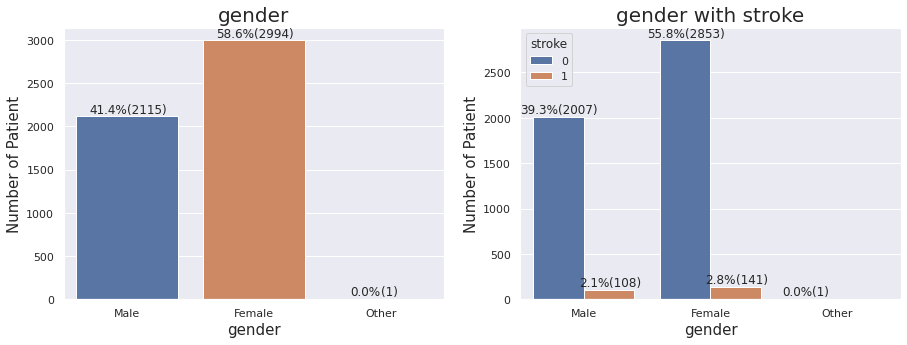

In [108]:
plot_category("gender")

จากข้อมูลทางการแพทย์ทั้งหมด 5,110 ราย 
- พบว่ามีผู้หญิง 2,979 (58%) และผู้ชาย 2,087 (41%) โดยมีผู้หญิงมากกว่าผู้ชาย 892 คน
- จำนวผู้ป่วยโรคหลอดเลือดสมองในผู้หญิง และผู้ชายมีจำนวนใกล้เคียงคือ 141 และ 108 คนตามลำดับโดยคิดเป็น 2.8% และ 2.1% จากทั้งหมด

### <font color="MidnightBlue"> Hypertension

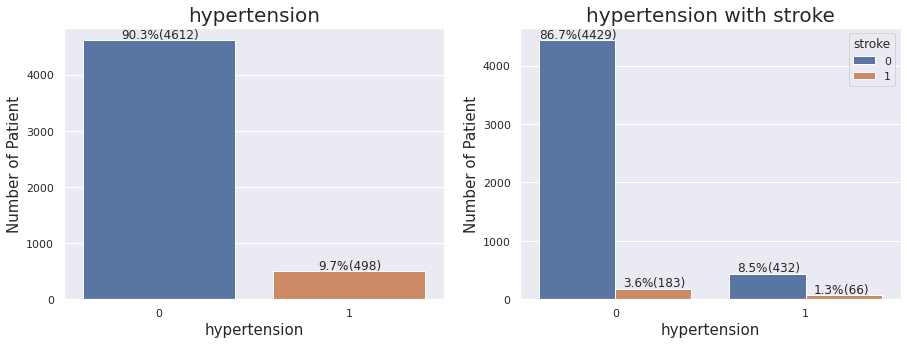

In [109]:
plot_category("hypertension")

- จำนวนคนที่เป็น Hypertension คิดเป็น 9.7% จากจำนวนคนทั้งหมด
- 3.6% เป็นคนที่มีอาการ stroke เพียงอย่างเดียว ในขณะที่ 1.3% เป็นคนที่มมีอาการ stroke ร่วมกับ Hypertension

### <font color="MidnightBlue"> Heart Disease

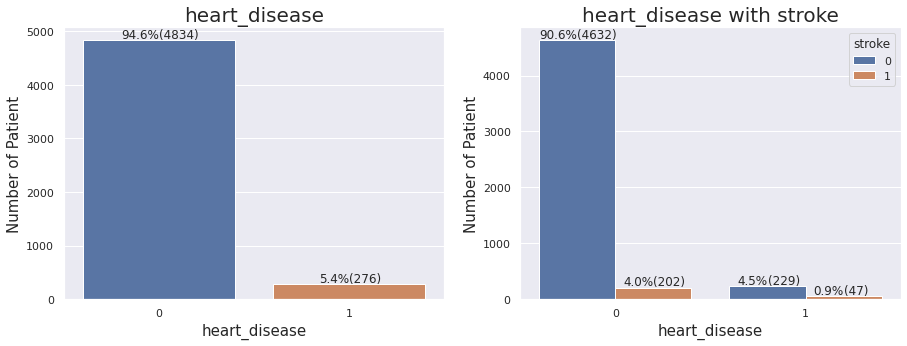

In [110]:
plot_category("heart_disease")

- จำนวนคนที่เป็น heart disease คิดเป็น 5.4% จากจำนวนคนทั้งหมด
- 4.0% เป็นคนที่มีอาการ stroke เพียงอย่างเดียว ในขณะที่ 0.9% เป็นคนที่มีอาการ stroke ร่วมกับ heart disease

### <font color="MidnightBlue"> Work Type

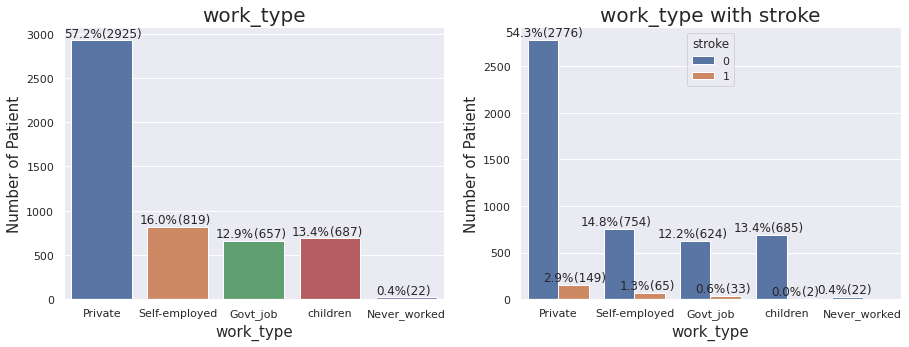

In [111]:
plot_category("work_type")

- ผู้ป่วยส่วนใหญ่กว่า 57.2% มี working type เป็น Private
- รองลงมาคือ Self-employed 16%, Government job 12.9% และ เป็นเด็ก 12.6%
- ในส่วนของผู้ป่วยที่ไม่ได้ทำงาน และ อื่นๆ มีจำนวนเพียงแค่ประมาณ 65คน

### <font color="MidnightBlue"> Ever Married

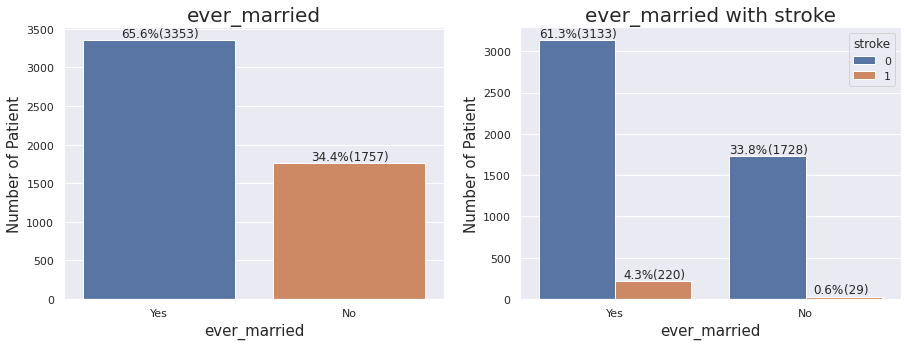

In [112]:
plot_category("ever_married")

- จำนวนคนที่แต่งงานแล้วคิดเป็น 65.6% จากจำนวนคนทั้งหมด

### <font color="MidnightBlue"> Residence Type

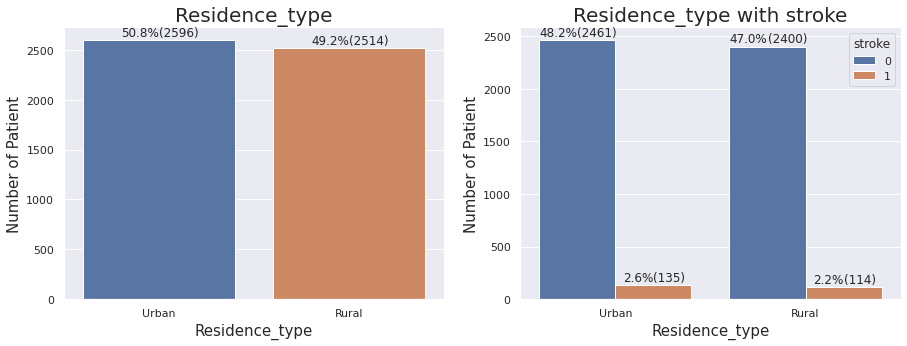

In [113]:
plot_category("Residence_type")

- ในส่วนของประเภทที่อยู่อาศัยของผู้ป่วย หรือ Residence type นั้น แบ่งออกเป็น Urban และ Rural ในปริมาณค่อนข้างใกล้เคียงกัน

### <font color="MidnightBlue"> Smoking Satus

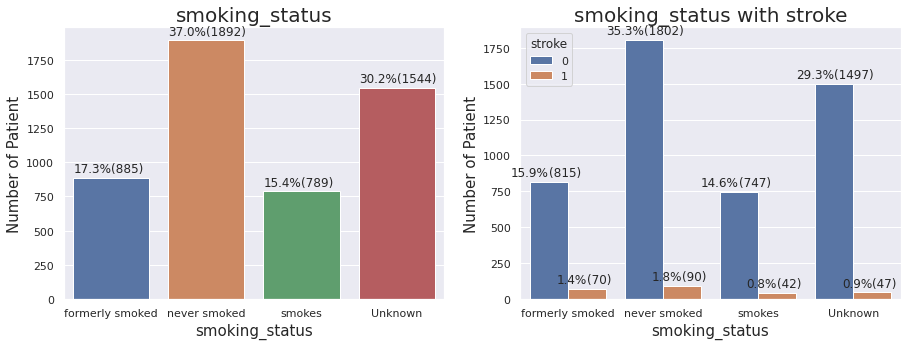

In [114]:
plot_category("smoking_status")

- มีจำนวนผู้ป่วยที่เป็น stroke ในปริมาณที่ใก้ลเคียงกันในทุกประเภทของประวัติการสูบบุหรี่

## <font color="MidnightBlue">4.2 Continuous data

In [115]:
def plot_continuous(col_name):
    fig, (ax1,ax2) = plt.subplots(2, figsize=(12, 10))
    sns.histplot(df_mod[df_mod['stroke'] == 0][col_name],bins=20, ax=ax1) # No Stroke - green
    sns.histplot(df_mod[df_mod['stroke'] == 1][col_name], color='chocolate',bins=20, ax=ax1) # Stroke - Red
    sns.boxplot(x=col_name, y = 'stroke', data = df_mod, hue_order=[0,1] , ax=ax2, orient='h')

    plt.title(f'No Stroke vs Stroke by {col_name}', fontsize=15)
    plt.show()

### <font color="MidnightBlue"> Avg Glucose Level

In [116]:
df_mod.groupby("stroke")["avg_glucose_level"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,104.795513,43.846069,55.12,77.12,91.47,112.83,267.76
1,249.0,132.544739,61.921056,56.11,79.79,105.22,196.71,271.74


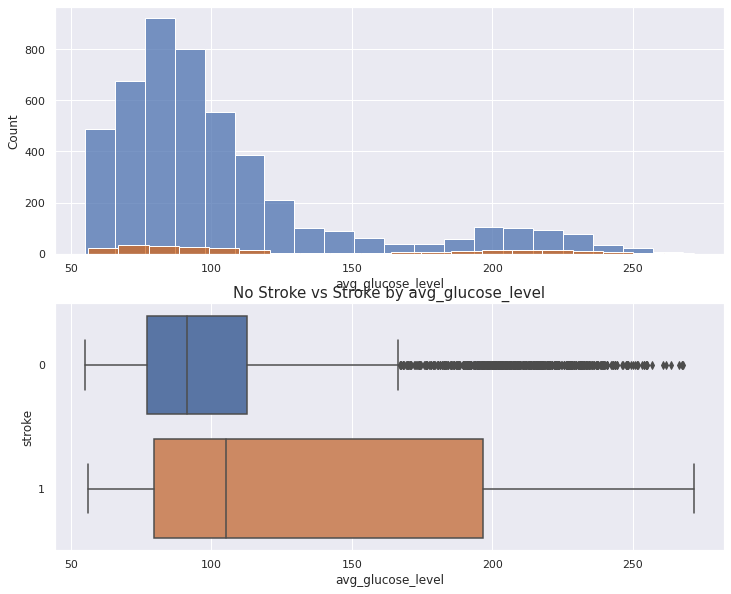

In [117]:
plot_continuous(header[8]) #Glucose

- Median ของปริมาณ glucose ในคนที่เป็น และ ไม่เป็น มีปริมาณใกล้เคียงกันที่ 91.47 และ 105.22 ตามลำดับ
- แต่ส่วนของคนที่มีอาการเป็น stroke มีการกระจายตัวมากกว่าคนที่ไม่เป็น โดยมีค่าระดับน้ำตาลในเลือดเฉลี่ยอยู่ในช่วงประมาณ 55 ถึง 130 ซึ่งเป็นการกระจายตัวจะมีลักษณะเป็น right skewed

### <font color="MidnightBlue"> BMI

In [118]:
df_mod.groupby("stroke")["bm"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,28.825388,7.776203,10.3,23.6,28.300000,32.8,97.6
1,249.0,30.217789,5.825589,16.9,27.0,28.893237,32.5,56.6


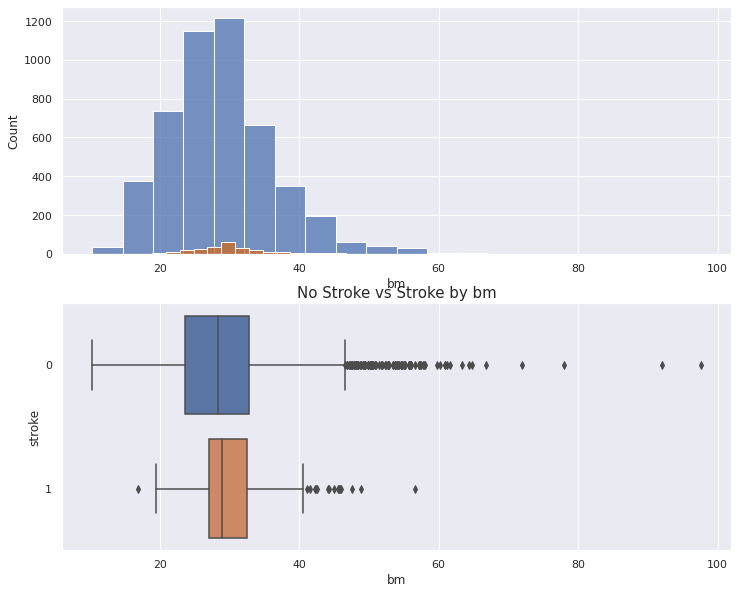

In [119]:
plot_continuous(header[9]) #BMI

- ค่า BMI ของคนที่เป็น และ ไม่เป็น มีแนวโน้มไปในทางเดียวกัน

### <font color="MidnightBlue"> Age

In [120]:
df_mod.groupby("stroke")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,41.975816,22.284029,1.00,24.0,43.0,59.0,82.0
1,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0


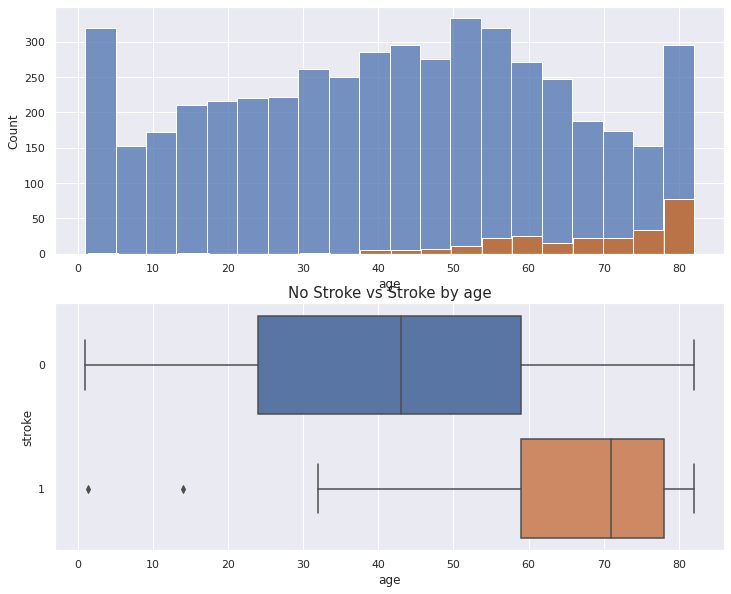

In [121]:
plot_continuous(header[2]) #Age

- ผู้ป่วยโรคหลอดเลือดสมองส่วนใหญ่จะเป็นผู้สูงอายุ หรือหากสังเกตุจากกราฟจะเริ่มพบผู้ป่วยโรคนี้ตั้งแต่อายุ 40 ปีขึ้นไป
- จาก boxplot การกระจายตัวของผู้ป่วยที่เป็น stroke อยู่ในช่วงอายุ มากกว่า 60 ปีขึ้นไป

# <font color="MidnightBlue">5. Data Preprocessing (Encoding)

In [122]:
df_preProcess = df_mod

In [123]:
df_check = df_preProcess.gender[df_preProcess.gender =='Other']
print(f'number of rows where the age is less than one: {len(df_check)}')
print(f'% of rows where the age is less than one: {( len(df_check)/df_preProcess.shape[0] )*100:.2f}%')

df_preProcess = df_preProcess.loc[df_mod.gender !='Other'] # drop 1 row of gender "Other"

number of rows where the age is less than one: 1
% of rows where the age is less than one: 0.02%


## <font color="MidnightBlue">5.1 Binary Categories

In [124]:
idx_gender={"Female":0,"Male":1} 
df_preProcess.gender = df_preProcess.gender.apply(lambda x:idx_gender[x])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [125]:
idx_married={"No":0,"Yes":1}
df_preProcess.ever_married = df_preProcess.ever_married.apply(lambda x:idx_married[x])

In [126]:
set(df_preProcess.gender)

{0, 1}

In [127]:
set(df_preProcess.ever_married)

{0, 1}

In [128]:
df_preProcess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bm                 5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 518.9+ KB


## <font color="MidnightBlue">5.2 Multicategory

In [129]:
idx_multiClassData = pd.get_dummies(df_preProcess[["work_type","Residence_type",'smoking_status']], prefix=['worktype','Residencetype','smokingstatus'])
print(idx_multiClassData.head())

   worktype_Govt_job  worktype_Never_worked  worktype_Private  \
0                  0                      0                 1   
1                  0                      0                 0   
2                  0                      0                 1   
3                  0                      0                 1   
4                  0                      0                 0   

   worktype_Self-employed  worktype_children  Residencetype_Rural  \
0                       0                  0                    0   
1                       1                  0                    1   
2                       0                  0                    1   
3                       0                  0                    0   
4                       1                  0                    1   

   Residencetype_Urban  smokingstatus_Unknown  smokingstatus_formerly smoked  \
0                    1                      0                              1   
1                    0            

## <font color="MidnightBlue">5.3 Assign binany category and  multi-category to new dataframe "df_preProcess"

In [130]:
df_preProcess= pd.concat([df_preProcess,idx_multiClassData], axis=1)

In [131]:
df_preProcess.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bm,...,worktype_Never_worked,worktype_Private,worktype_Self-employed,worktype_children,Residencetype_Rural,Residencetype_Urban,smokingstatus_Unknown,smokingstatus_formerly smoked,smokingstatus_never smoked,smokingstatus_smokes
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.600000,...,0,1,0,0,0,1,0,1,0,0
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,...,0,0,1,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.500000,...,0,1,0,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.400000,...,0,1,0,0,0,1,0,0,0,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,...,0,0,1,0,1,0,0,0,1,0


In [132]:
# Write Dataframe After pre process
df_Final = df_preProcess.drop(columns=['work_type', 'Residence_type', 'smoking_status'])
df_Final.head()

df_Final.to_csv("StrokeData_Final.csv", index=False)

# <font color="MidnightBlue">6. Feature selection

In [133]:
# Change column position
old_cols = df_Final.columns.values 
new_cols= ['id', 'gender', 'hypertension', 'heart_disease',
       'ever_married', 'avg_glucose_level', 'bm', 
       'worktype_Govt_job', 'worktype_Never_worked', 'worktype_Private',
       'worktype_Self-employed', 'worktype_children',
       'Residencetype_Rural', 'Residencetype_Urban',
       'smokingstatus_Unknown', 'smokingstatus_formerly smoked',
       'smokingstatus_never smoked', 'smokingstatus_smokes', 'age', 'stroke']
df_Final = df_Final.reindex(columns=new_cols)
cols = df_Final.columns.values 


## <font color="MidnightBlue">6.1 Pearson Correlation

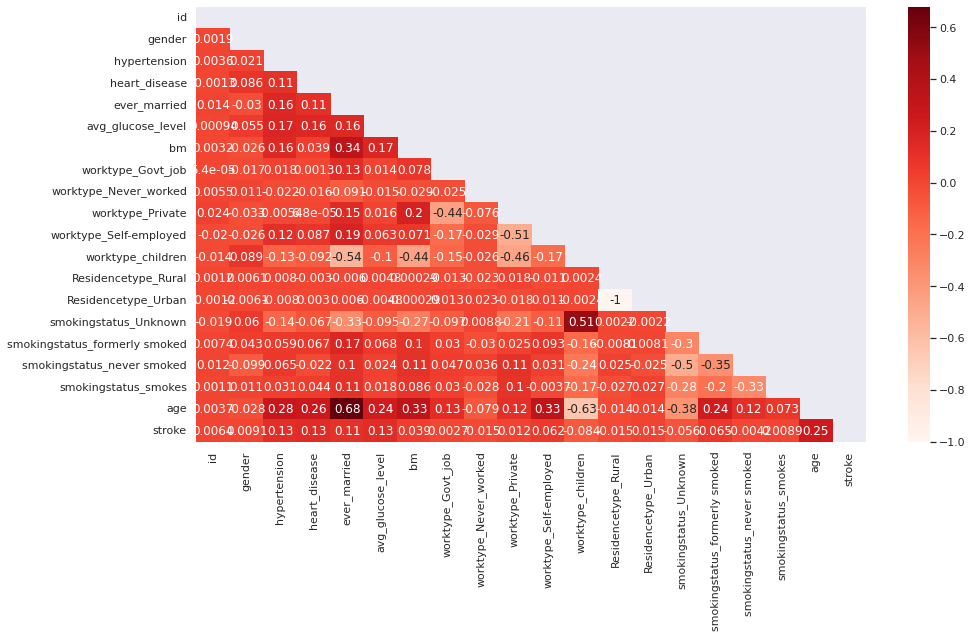

correlated features > 0.1 :
hypertension         0.127891
heart_disease        0.134905
ever_married         0.108299
avg_glucose_level    0.131991
age                  0.245281
stroke               1.000000
Name: stroke, dtype: float64


In [134]:
#Using Pearson Correlation
# Compute the correlation matrix
plt.figure(figsize=(15,8))
cor = df_Final.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor,mask =mask, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["stroke"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
print(f'correlated features > 0.1 :\n{relevant_features}')

> เมื่อทำ Pearson correlated พบว่ามี 5 columns ที่มีค่า correlation กับการเป็น stroke มากกว่า 0.1 คือ age, heart_disease, avg_glucose_level, hypertension และ ever_married ตามลำดับ<br><br>
> และ Feature ที่มีค่า correlation กับการเป็น stroke สูงที่สุดคือ 'age' ที่ 0.245 โดย Features อื่นๆทีมี่ค่า correlation กับการเป็น stroke น้อยกว่า 1 นั้นส่วนใหญ่จะมี correlated กับ age ด้วย

In [135]:
cols_Select = pd.DataFrame(cor_target)
cols_SelectShow =  cols_Select.sort_values(by=['stroke'], ascending=False)
cols_SelectShow.head(10)

,stroke
stroke,1.000000
age,0.245281
heart_disease,0.134905
avg_glucose_level,0.131991
hypertension,0.127891
ever_married,0.108299
worktype_children,0.083888
smokingstatus_formerly smoked,0.064683
worktype_Self-employed,0.062150
smokingstatus_Unknown,0.055924


> จากตารางคือ Top 10 Featrures ที่มีค่า correlation กับหารเป็น stroke สูงที่สุด
> ดังนั้นเราจึงเลือกใช้เฉพาะ Features ที่มีค่า correlation กับหารเป็น stroke มากกว่า 0.05 เพื่อใช้ในการทำ Model ต่อไป

## <font color="MidnightBlue">6.2 Final Dateset

In [136]:
cols_Select = pd.DataFrame(cor_target)
cols_Select = cols_Select[cols_Select.stroke > 0.1]

In [137]:
cols_Select

,stroke
hypertension,0.127891
heart_disease,0.134905
ever_married,0.108299
avg_glucose_level,0.131991
age,0.245281
stroke,1.000000


In [138]:
cols_Select = cols_Select.reset_index(col_fill= "Parameters")

In [139]:
x = df_Final[list(cols_Select["index"])[0:-1]]
y = df_Final[list(cols_Select["index"])[-1]]

In [140]:
x.head()

,hypertension,heart_disease,ever_married,avg_glucose_level,age
0,0,1,1,228.69,67.0
1,0,0,1,202.21,61.0
2,0,1,1,105.92,80.0
3,0,0,1,171.23,49.0
4,1,0,1,174.12,79.0


In [141]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

# <font color="MidnightBlue">7. Splitting the dataset into the Training set (80%) and Test set (20%)

In [142]:
# Train 80: Test 20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

print(f'''Train Dataset:
Number x_train dataset: {x_train.shape}
Number y_train dataset: {y_train.shape}

Test Dataset:
Number x_test dataset: {x_test.shape}
Number y_test dataset: {y_test.shape}''')

Train Dataset:
Number x_train dataset: (4087, 5)
Number y_train dataset: (4087,)

Test Dataset:
Number x_test dataset: (1022, 5)
Number y_test dataset: (1022,)


# <font color="MidnightBlue">8. Feature Scaling with StandardScaler

In [143]:
numeric_features = list(x.select_dtypes('float64').columns)
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_features = list(x.select_dtypes('int64').columns)
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),])

In [144]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [145]:
x_train

array([[ 1.94917668,  0.68793278,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.09498732, -1.12888266,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.60366621,  1.39693393,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.25407307,  0.0232442 ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.32228318, -0.99594495,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.02730892,  0.64362021,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [146]:
x_test

array([[ 8.48760330e-01,  1.70712194e+00,  1.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.16188445e-03, -1.74925867e+00,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-7.39240664e-01,  4.22057352e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 2.88896916e+00,  1.52987165e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 2.99431081e-01, -3.31256371e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-5.82571962e-01, -1.79357124e+00,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

# <font color="MidnightBlue">9. Handling Imbalance data using SMOTE

In [147]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3892 

After OverSampling, the shape of train_X: (7784, 8)
After OverSampling, the shape of train_y: (7784,) 

After OverSampling, counts of label '1': 3892
After OverSampling, counts of label '0': 3892


In [148]:
x_train_smote

array([[ 1.94917668,  0.68793278,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.09498732, -1.12888266,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.60366621,  1.39693393,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.00510745,  0.76370402,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.90453383,  0.67702446,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.81289741,  0.62346461,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [149]:
y_train_smote

array([0, 0, 1, ..., 1, 1, 1])

# <font color="MidnightBlue">10. Model Selection

## <font color="MidnightBlue">10.1 K-Fold Cross Validation

In [150]:
# get a list of models to evaluate
def get_models():
    models = list()
    models.append({'LogisticRegression':LogisticRegression()})
    models.append({'RidgeClassifier':RidgeClassifier()})
    models.append({'SGDClassifier':SGDClassifier()})
    models.append({'KNeighborsClassifier':KNeighborsClassifier()})
    models.append({'DecisionTreeClassifier':DecisionTreeClassifier()})
    models.append({'ExtraTreeClassifier':ExtraTreeClassifier()})
    models.append({'LinearSVC':LinearSVC()})
    models.append({'SVC':SVC()})
    models.append({'RandomForestClassifier':RandomForestClassifier()})
    models.append({'XGBoost':XGBClassifier(eval_metric= 'error')})
    return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model, x_data, y_data):
    # evaluate the model
    scores = cross_val_score(model, x_data, y_data, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores)
 

In [151]:
# define test conditions
cv = KFold(n_splits=5, shuffle=True, random_state=17)

# get the list of models to consider
models = get_models()

# collect results
cv_results = list()
model_results = list()

# evaluate each model
for idx, model in enumerate(models):
    s_model =  list(model.values())
    name_model = list(model.keys())
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, s_model[0], x_train_smote, y_train_smote)
    # check for invalid results
    if isnan(cv_mean):
        continue
    # store results
    cv_results.append(cv_mean)
    model_results.append(name_model[0])
    # summarize progress
    #print('>%s:, cv=%.3f' % (type(model).__name__, cv_mean))

print("Done !!! ")

CVresults_df = pd.DataFrame()
CVresults_df['Model'] = model_results
CVresults_df['ACC_results'] = cv_results
CVresults_df = CVresults_df.sort_values(by=['ACC_results'], ascending=False)
CVresults_df

Done !!! 


,Model,ACC_results
4,DecisionTreeClassifier,0.919447
8,RandomForestClassifier,0.900822
5,ExtraTreeClassifier,0.856371
3,KNeighborsClassifier,0.855473
9,XGBoost,0.828109
7,SVC,0.787641
2,SGDClassifier,0.780575
1,RidgeClassifier,0.778647
6,LinearSVC,0.776207
0,LogisticRegression,0.774923


> จากตารางคือค่า mean accuracy จากการทำ valuate model ด้วย K-Fold Cross Validation ที่จำนวน K-Fold = 5

## <font color="MidnightBlue">10.2 Confusion matrix

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

accuracy, precision, recall, f1 = {}, {}, {}, {}

for idx, model in enumerate(models):
    
    s_model =  list(model.values())
    name_model = list(model.keys())
    
    key = Pipeline([('clf',s_model[0])])
    # Fit the classifier model
    key.fit(x_train_smote, y_train_smote)

    # Prediction 
    predictions = key.predict(x_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions,y_test)
    precision[key] = precision_score(predictions,y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

## <font color="MidnightBlue">10.3 Summary Model Selection

In [153]:
name_model = [ list(x.keys())[0] for i, x in enumerate(models)]

df_model = pd.DataFrame(index=name_model, columns=['Accuracy', 'Precision', 'Recall', 'F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()

df_model = df_model.sort_values(by=['Precision'], ascending=False)
df_model

,Accuracy,Precision,Recall,F1
RidgeClassifier,0.737769,0.722222,0.133562,0.225434
SGDClassifier,0.752446,0.722222,0.140794,0.235650
LinearSVC,0.751468,0.722222,0.140288,0.234940
SVC,0.751468,0.722222,0.140288,0.234940
LogisticRegression,0.758317,0.703704,0.141264,0.235294
XGBoost,0.763209,0.574074,0.124000,0.203947
KNeighborsClassifier,0.808219,0.462963,0.130208,0.203252
ExtraTreeClassifier,0.842466,0.240741,0.097744,0.139037
RandomForestClassifier,0.875734,0.240741,0.131313,0.169935
DecisionTreeClassifier,0.896282,0.148148,0.117647,0.131148


# <font color="MidnightBlue">11. Tuning the Models

## <font color="MidnightBlue">11.1 RidgeClassifier

In [154]:
'''
#Grid
from sklearn.linear_model import RidgeClassifier
parameter_grid = {'alpha': [0.0001, 0.001, 0.1, 1.0, 1.25, 1.5,],
                  'fit_intercept': [True, False],
                  'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

RidgeClassifier = RidgeClassifier()

RidgeClassifier_cv = GridSearchCV(estimator = RidgeClassifier,
                                  param_grid = parameter_grid, scoring = 'accuracy', cv = 5, verbose=0)

RidgeClassifier_cv.fit(x_train_smote, y_train_smote)

best_accuracy = RidgeClassifier_cv.best_score_
best_param = RidgeClassifier_cv.best_params_
print(f'best_accuracy: {best_accuracy}')
print(f'best_param: {best_param}')
'''

"\n#Grid\nfrom sklearn.linear_model import RidgeClassifier\nparameter_grid = {'alpha': [0.0001, 0.001, 0.1, 1.0, 1.25, 1.5,],\n                  'fit_intercept': [True, False],\n                  'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}\n\nRidgeClassifier = RidgeClassifier()\n\nRidgeClassifier_cv = GridSearchCV(estimator = RidgeClassifier,\n                                  param_grid = parameter_grid, scoring = 'accuracy', cv = 5, verbose=0)\n\nRidgeClassifier_cv.fit(x_train_smote, y_train_smote)\n\nbest_accuracy = RidgeClassifier_cv.best_score_\nbest_param = RidgeClassifier_cv.best_params_\nprint(f'best_accuracy: {best_accuracy}')\nprint(f'best_param: {best_param}')\n"

In [155]:
#Model All
from sklearn.linear_model import RidgeClassifier
models_select = {}
# RidgeClassifier
# Accuracy =0.
models_select['RidgeClassifier_01'] = RidgeClassifier(alpha = 0.0001, solver = 'lbfgs', positive = True, fit_intercept = False)
models_select['RidgeClassifier_02'] = RidgeClassifier(alpha = 0.0001, solver = 'lsqr', fit_intercept = False)

In [156]:
clf = models_select['RidgeClassifier_01']
scores = cross_val_score(clf, x_train_smote, y_train_smote, cv=5, scoring='accuracy')

print(scores)
print(scores.mean())

#Train set 80%
clf = clf.fit(x_train_smote, y_train_smote)

print("Training:"+str(clf.score(x_train_smote, y_train_smote)))
print("Test:"+str(clf.score(x_test,y_test)))

pred_train80 = clf.predict(x_train_smote)

pred_test20 = clf.predict(x_test)

print(f'\nTrain Set:\n{classification_report(y_train_smote, pred_train80)}')
print(f'Test Set:\n{classification_report(y_test, pred_test20)}')

[0.74438022 0.74052665 0.75208735 0.73410405 0.73071979]
0.7403636120480853
Training:0.7410071942446043
Test:0.5489236790606654

Train Set:
              precision    recall  f1-score   support

           0       0.96      0.50      0.66      3892
           1       0.66      0.98      0.79      3892

    accuracy                           0.74      7784
   macro avg       0.81      0.74      0.73      7784
weighted avg       0.81      0.74      0.73      7784

Test Set:
              precision    recall  f1-score   support

           0       0.99      0.53      0.69       968
           1       0.10      0.93      0.18        54

    accuracy                           0.55      1022
   macro avg       0.55      0.73      0.43      1022
weighted avg       0.95      0.55      0.66      1022



In [157]:
clf = models_select['RidgeClassifier_02']
scores = cross_val_score(clf, x_train_smote, y_train_smote, cv=5, scoring='accuracy')

print(scores)
print(scores.mean())

#Train set 80%
clf = clf.fit(x_train_smote, y_train_smote)

print("Training:"+str(clf.score(x_train_smote, y_train_smote)))
print("Test:"+str(clf.score(x_test,y_test)))

pred_train80 = clf.predict(x_train_smote)

pred_test20 = clf.predict(x_test)

print(f'\nTrain Set:\n{classification_report(y_train_smote, pred_train80)}')
print(f'Test Set:\n{classification_report(y_test, pred_test20)}')

[0.79447656 0.77263969 0.78355812 0.77135517 0.77313625]
0.7790331581562989
Training:0.7795477903391572
Test:0.7377690802348337

Train Set:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      3892
           1       0.75      0.84      0.79      3892

    accuracy                           0.78      7784
   macro avg       0.78      0.78      0.78      7784
weighted avg       0.78      0.78      0.78      7784

Test Set:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       968
           1       0.13      0.72      0.23        54

    accuracy                           0.74      1022
   macro avg       0.56      0.73      0.53      1022
weighted avg       0.93      0.74      0.81      1022



In [158]:
models_select['RidgeClassifier_03'] = RidgeClassifier(alpha = 0.5, fit_intercept=False, tol=0.0001, solver='cholesky', random_state='saga')

clf = models_select['RidgeClassifier_03']
clf.fit(x_train_smote,y_train_smote)

clf_pred = clf.predict(x_train_smote)
print('Train Set:\n', classification_report(y_train_smote, clf_pred))

clf_pred = clf.predict(x_test)
print('Test Set:\n', classification_report(y_test, clf_pred))

Train Set:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77      3892
           1       0.75      0.84      0.79      3892

    accuracy                           0.78      7784
   macro avg       0.78      0.78      0.78      7784
weighted avg       0.78      0.78      0.78      7784

Test Set:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       968
           1       0.13      0.72      0.23        54

    accuracy                           0.74      1022
   macro avg       0.56      0.73      0.53      1022
weighted avg       0.93      0.74      0.81      1022



In [159]:
models_select['RidgeClassifier_03'] = RidgeClassifier(alpha = 0.5, fit_intercept=False, solver='svd')

clf = models_select['RidgeClassifier_03']
clf.fit(x_train_smote,y_train_smote)

clf_pred = clf.predict(x_train_smote)
print('Train Set:\n', classification_report(y_train_smote, clf_pred))

clf_pred = clf.predict(x_test)
print('Test Set:\n', classification_report(y_test, clf_pred))

Train Set:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77      3892
           1       0.75      0.84      0.79      3892

    accuracy                           0.78      7784
   macro avg       0.78      0.78      0.78      7784
weighted avg       0.78      0.78      0.78      7784

Test Set:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       968
           1       0.13      0.72      0.23        54

    accuracy                           0.74      1022
   macro avg       0.56      0.73      0.53      1022
weighted avg       0.93      0.74      0.81      1022



## <font color="MidnightBlue">11.2 LinearSVC

In [160]:
'''
#Grid
parameter_grid = {'penalty': ['l2'],
                  'C': [0.0001, 0.001, 0.01, 0.1, 1, 1.25, 1.5],
                  'loss': ['hinge', 'squared_hinge'],
                  'multi_class': ['ovr', 'crammer_singer'],
                  'max_iter': [200000, 100000]}

linearsvc = LinearSVC()

linearsvc_cv=GridSearchCV(estimator = linearsvc, param_grid = parameter_grid, scoring = 'accuracy', cv = 5, verbose=0)

linearsvc_cv.fit(x_train_smote, y_train_smote)

best_accuracy = linearsvc_cv.best_score_
best_param = linearsvc_cv.best_params_
print(f'best_accuracy: {best_accuracy}')
print(f'best_param: {best_param}')

'''

"\n#Grid\nparameter_grid = {'penalty': ['l2'],\n                  'C': [0.0001, 0.001, 0.01, 0.1, 1, 1.25, 1.5],\n                  'loss': ['hinge', 'squared_hinge'],\n                  'multi_class': ['ovr', 'crammer_singer'],\n                  'max_iter': [200000, 100000]}\n\nlinearsvc = LinearSVC()\n\nlinearsvc_cv=GridSearchCV(estimator = linearsvc, param_grid = parameter_grid, scoring = 'accuracy', cv = 5, verbose=0)\n\nlinearsvc_cv.fit(x_train_smote, y_train_smote)\n\nbest_accuracy = linearsvc_cv.best_score_\nbest_param = linearsvc_cv.best_params_\nprint(f'best_accuracy: {best_accuracy}')\nprint(f'best_param: {best_param}')\n\n"

In [161]:
#Model All
models_select = {}
# LinearSVC
# Accuracy =0.781
models_select['LinearSVC_01'] = LinearSVC(C= 0.001,multi_class = 'crammer_singer',penalty = 'l2',loss='hinge')

In [162]:
clf = models_select['LinearSVC_01']
scores = cross_val_score(clf, x_train_smote, y_train_smote, cv=5, scoring='accuracy')

print(scores)
print(scores.mean())

#Train set 80%
clf = clf.fit(x_train_smote, y_train_smote)

print("Training:"+str(clf.score(x_train_smote, y_train_smote)))
print("Test:"+str(clf.score(x_test,y_test)))

pred_train80 = clf.predict(x_train_smote)

pred_test20 = clf.predict(x_test)

print(f'\nTrain Set:\n{classification_report(y_train_smote, pred_train80)}')
print(f'Test Set:\n{classification_report(y_test, pred_test20)}')

[0.79062299 0.77199743 0.78998073 0.78098908 0.77570694]
0.7818594357021033
Training:0.7818602261048304
Test:0.723091976516634

Train Set:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76      3892
           1       0.74      0.86      0.80      3892

    accuracy                           0.78      7784
   macro avg       0.79      0.78      0.78      7784
weighted avg       0.79      0.78      0.78      7784

Test Set:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       968
           1       0.13      0.78      0.23        54

    accuracy                           0.72      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.94      0.72      0.80      1022



## <font color="MidnightBlue">11.3 SVC

In [163]:
'''
#Grid
parameter_grid = {'C': [0.25,0.5,0.75,1,1.25,1.5],
                  'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
                  'gamma': ['scale', 'auto'],'random_state':[0]}

svm = SVC()

svm_cv=GridSearchCV(estimator = svm, param_grid = parameter_grid, scoring = 'accuracy', cv = 5, verbose=0)

svm_cv.fit(x_train_smote, y_train_smote)

best_accuracy = svm_cv.best_score_
best_param = svm_cv.best_params_
print(f'best_accuracy: {best_accuracy}')
print(f'best_param: {best_param}')

'''

"\n#Grid\nparameter_grid = {'C': [0.25,0.5,0.75,1,1.25,1.5],\n                  'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],\n                  'gamma': ['scale', 'auto'],'random_state':[0]}\n\nsvm = SVC()\n\nsvm_cv=GridSearchCV(estimator = svm, param_grid = parameter_grid, scoring = 'accuracy', cv = 5, verbose=0)\n\nsvm_cv.fit(x_train_smote, y_train_smote)\n\nbest_accuracy = svm_cv.best_score_\nbest_param = svm_cv.best_params_\nprint(f'best_accuracy: {best_accuracy}')\nprint(f'best_param: {best_param}')\n\n"

In [164]:
#Model All
models_select = {}
# SVC 
# Accuracy =0.7885
models_select['SVC_01'] = SVC(C= 1.5, gamma = 'scale', kernel = 'rbf', random_state = 0)
# Accuracy =0.7884
models_select['SVC_02'] = SVC(C= 1.25, gamma = 'scale', kernel = 'rbf', random_state = 0)

In [165]:
clf = models_select['SVC_01']
scores = cross_val_score(clf, x_train_smote, y_train_smote, cv=5, scoring='accuracy')

print(scores)
print(scores.mean())

#Train set 80%
clf = clf.fit(x_train_smote, y_train_smote)

print("Training:"+str(clf.score(x_train_smote, y_train_smote)))
print("Test:"+str(clf.score(x_test,y_test)))

pred_train80 = clf.predict(x_train_smote)

pred_test20 = clf.predict(x_test)

print(f'\nTrain Set:\n{classification_report(y_train_smote, pred_train80)}')
print(f'Test Set:\n{classification_report(y_test, pred_test20)}')

[0.7970456  0.78098908 0.79511882 0.78484265 0.78470437]
0.7885401033230802
Training:0.7920092497430626
Test:0.7524461839530333

Train Set:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      3892
           1       0.76      0.84      0.80      3892

    accuracy                           0.79      7784
   macro avg       0.80      0.79      0.79      7784
weighted avg       0.80      0.79      0.79      7784

Test Set:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       968
           1       0.14      0.72      0.24        54

    accuracy                           0.75      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.94      0.75      0.82      1022



## <font color="MidnightBlue">11.4 LogisticRegression

In [166]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Grid
parameter_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty':['l1','l2','elasticnet'],
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter': list(range(10,200,10)),
              }

logreg=LogisticRegression()

logreg_cv=GridSearchCV(estimator = logreg,  
                           param_grid = parameter_grid,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)

logreg_cv.fit(x_train_smote, y_train_smote)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("best score :",logreg_cv.best_score_)

'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\n\n#Grid\nparameter_grid = {\'solver\': [\'newton-cg\', \'lbfgs\', \'liblinear\', \'sag\', \'saga\'],\n              \'penalty\':[\'l1\',\'l2\',\'elasticnet\'],\n              \'C\':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],\n              \'max_iter\': list(range(10,200,10)),\n              }\n\nlogreg=LogisticRegression()\n\nlogreg_cv=GridSearchCV(estimator = logreg,  \n                           param_grid = parameter_grid,\n                           scoring = \'precision\',\n                           cv = 5,\n                           verbose=0)\n\nlogreg_cv.fit(x_train_smote, y_train_smote)\n\nprint("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)\nprint("best score :",logreg_cv.best_score_)\n\n'

In [167]:
#Model All
models_select = {}
# Logistic Regression 
# Accuracy =0.79
models_select['LogisticRegression_01'] = LogisticRegression(C= 0.001, max_iter= 10,solver = 'saga', penalty = 'l1')
# Preciion =0.76
models_select['LogisticRegression_02'] = LogisticRegression(C= 1, max_iter= 10,solver = 'sag', penalty = 'l2')


In [168]:
clf = models_select['LogisticRegression_01']
scores = cross_val_score(clf, x_train_smote, y_train_smote, cv=5, scoring='accuracy')

print(scores)
print(scores.mean())

#Train set 80%
clf = clf.fit(x_train_smote, y_train_smote)

print("Training:"+str(clf.score(x_train_smote, y_train_smote)))
print("Test:"+str(clf.score(x_test,y_test)))

pred_train80 = clf.predict(x_train_smote)

pred_test20 = clf.predict(x_test)
clf.predict_proba(x_test[:1])

print(f'\nTrain Set:\n{classification_report(y_train_smote, pred_train80)}')
print(f'Test Set:\n{classification_report(y_test, pred_test20)}')

[0.79640334 0.78484265 0.78933847 0.79319204 0.78984576]
0.7907244503222035
Training:0.7894398766700925
Test:0.7191780821917808

Train Set:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      3892
           1       0.75      0.87      0.81      3892

    accuracy                           0.79      7784
   macro avg       0.80      0.79      0.79      7784
weighted avg       0.80      0.79      0.79      7784

Test Set:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       968
           1       0.13      0.78      0.23        54

    accuracy                           0.72      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.94      0.72      0.80      1022



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [169]:
clf = models_select['LogisticRegression_02']
scores = cross_val_score(clf, x_train_smote, y_train_smote, cv=5, scoring='accuracy')

print(scores)
print(scores.mean())

#Train set 80%
clf = clf.fit(x_train_smote, y_train_smote)

print("Training:"+str(clf.score(x_train_smote, y_train_smote)))
print("Test:"+str(clf.score(x_test,y_test)))

pred_train80 = clf.predict(x_train_smote)

pred_test20 = clf.predict(x_test)
clf.predict_proba(x_test[:1])

print(f'\nTrain Set:\n{classification_report(y_train_smote, pred_train80)}')
print(f'Test Set:\n{classification_report(y_test, pred_test20)}')

[0.78484265 0.77392421 0.78291586 0.76621708 0.77056555]
0.7756930720042003
Training:0.7756937307297019
Test:0.7622309197651663

Train Set:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      3892
           1       0.76      0.80      0.78      3892

    accuracy                           0.78      7784
   macro avg       0.78      0.78      0.78      7784
weighted avg       0.78      0.78      0.78      7784

Test Set:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       968
           1       0.14      0.69      0.23        54

    accuracy                           0.76      1022
   macro avg       0.56      0.73      0.55      1022
weighted avg       0.93      0.76      0.83      1022



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

## <font color="MidnightBlue">11.6 KNN

In [170]:
'''
from sklearn.neighbors import KNeighborsClassifier

#Grid
parameter_grid = {'weights': ['uniform', 'distance'],
              'algorithm':['auto','ball_tree','kd_tree'],
              'leaf_size':list(range(10,101,10)),
              'n_neighbors': list(range(1,5,1)),
              }

knn = KNeighborsClassifier()

knn_cv=GridSearchCV(estimator = knn,  
                           param_grid = parameter_grid,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
knn_cv.fit(x_train_smote, y_train_smote)

#knn = KNeighborsClassifier)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("best score :",knn_cv.best_score_)

'''

'\nfrom sklearn.neighbors import KNeighborsClassifier\n\n#Grid\nparameter_grid = {\'weights\': [\'uniform\', \'distance\'],\n              \'algorithm\':[\'auto\',\'ball_tree\',\'kd_tree\'],\n              \'leaf_size\':list(range(10,101,10)),\n              \'n_neighbors\': list(range(1,5,1)),\n              }\n\nknn = KNeighborsClassifier()\n\nknn_cv=GridSearchCV(estimator = knn,  \n                           param_grid = parameter_grid,\n                           scoring = \'precision\',\n                           cv = 5,\n                           verbose=0)\nknn_cv.fit(x_train_smote, y_train_smote)\n\n#knn = KNeighborsClassifier)\n\nprint("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)\nprint("best score :",knn_cv.best_score_)\n\n'

In [171]:
models_select['KNN_01'] = KNeighborsClassifier(n_neighbors=5, leaf_size = 10, weights='distance')

In [172]:
clf = models_select['KNN_01']
scores = cross_val_score(clf, x_train_smote, y_train_smote, cv=5, scoring='accuracy')

print(scores)
print(scores.mean())

#Train set 80%
clf = clf.fit(x_train_smote, y_train_smote)

print("Training:"+str(clf.score(x_train_smote, y_train_smote)))
print("Test:"+str(clf.score(x_test,y_test)))

pred_train80 = clf.predict(x_train_smote)

pred_test20 = clf.predict(x_test)
clf.predict_proba(x_test[:1])

print(f'\nTrain Set:\n{classification_report(y_train_smote, pred_train80)}')
print(f'Test Set:\n{classification_report(y_test, pred_test20)}')

[0.87411689 0.86833654 0.86512524 0.87347463 0.85604113]
0.8674188877496605
Training:1.0
Test:0.8268101761252447

Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3892
           1       1.00      1.00      1.00      3892

    accuracy                           1.00      7784
   macro avg       1.00      1.00      1.00      7784
weighted avg       1.00      1.00      1.00      7784

Test Set:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       968
           1       0.13      0.41      0.20        54

    accuracy                           0.83      1022
   macro avg       0.55      0.63      0.55      1022
weighted avg       0.92      0.83      0.87      1022



In [173]:
models_select['KNN_02'] = KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto')

clf = models_select['KNN_02']
clf.fit(x_train_smote,y_train_smote)

clf_pred = clf.predict(x_train_smote)
print('Train Set:\n', classification_report(y_train_smote, clf_pred))

clf_pred = clf.predict(x_test)
print('Test Set:\n', classification_report(y_test, clf_pred))

Train Set:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3892
           1       1.00      0.89      0.94      3892

    accuracy                           0.94      7784
   macro avg       0.95      0.94      0.94      7784
weighted avg       0.95      0.94      0.94      7784

Test Set:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       968
           1       0.15      0.28      0.19        54

    accuracy                           0.88      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.91      0.88      0.89      1022



In [174]:
models_select['KNN_03'] = KNeighborsClassifier(n_neighbors=2, weights='distance', algorithm='auto')

clf = models_select['KNN_03']
clf.fit(x_train_smote,y_train_smote)

clf_pred = clf.predict(x_train_smote)
print('Train Set:\n', classification_report(y_train_smote, clf_pred))

clf_pred = clf.predict(x_test)
print('Test Set:\n', classification_report(y_test, clf_pred))

Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3892
           1       1.00      1.00      1.00      3892

    accuracy                           1.00      7784
   macro avg       1.00      1.00      1.00      7784
weighted avg       1.00      1.00      1.00      7784

Test Set:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       968
           1       0.12      0.31      0.17        54

    accuracy                           0.84      1022
   macro avg       0.54      0.59      0.54      1022
weighted avg       0.91      0.84      0.87      1022



In [175]:
models_select['KNN_04'] = KNeighborsClassifier(n_neighbors=4, weights='distance', algorithm='auto', n_jobs=None)

clf = models_select['KNN_04']
clf.fit(x_train_smote,y_train_smote)

clf_pred = clf.predict(x_train_smote)
print('Train Set:\n', classification_report(y_train_smote, clf_pred))

clf_pred = clf.predict(x_test)
print('Test Set:\n', classification_report(y_test, clf_pred))

Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3892
           1       1.00      1.00      1.00      3892

    accuracy                           1.00      7784
   macro avg       1.00      1.00      1.00      7784
weighted avg       1.00      1.00      1.00      7784

Test Set:
               precision    recall  f1-score   support

           0       0.96      0.86      0.90       968
           1       0.12      0.37      0.19        54

    accuracy                           0.83      1022
   macro avg       0.54      0.61      0.55      1022
weighted avg       0.92      0.83      0.87      1022



## <font color="MidnightBlue">11.7 RandomForestClassifier

In [176]:
"""#Grid
param_grid = { 
    'n_estimators': list(range(100,500,100)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(2,11,1)),
    'criterion' :['gini', 'entropy']
}

rfc=RandomForestClassifier(random_state=42)

cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

cv_rfc.fit(x_train_smote, y_train_smote)

cv_rfc.best_params_"""

"#Grid\nparam_grid = { \n    'n_estimators': list(range(100,500,100)),\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth' : list(range(2,11,1)),\n    'criterion' :['gini', 'entropy']\n}\n\nrfc=RandomForestClassifier(random_state=42)\n\ncv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)\n\ncv_rfc.fit(x_train_smote, y_train_smote)\n\ncv_rfc.best_params_"

In [177]:
#rf1
rf = RandomForestClassifier(criterion= 'gini',  max_depth = 10, max_features = 'log2', n_estimators= 400)
rf.fit(x_train_smote,y_train_smote)

rf_pred = rf.predict(x_train_smote)
print('Train Set:\n', classification_report(y_train_smote, rf_pred))

rf_pred = rf.predict(x_test)
print('Test Set:\n', classification_report(y_test, rf_pred))

Train Set:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      3892
           1       0.85      0.93      0.89      3892

    accuracy                           0.88      7784
   macro avg       0.89      0.88      0.88      7784
weighted avg       0.89      0.88      0.88      7784

Test Set:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90       968
           1       0.15      0.54      0.24        54

    accuracy                           0.82      1022
   macro avg       0.56      0.68      0.57      1022
weighted avg       0.93      0.82      0.86      1022



In [178]:
#rf2
rf2 = RandomForestClassifier(criterion= 'gini',  max_depth = 15, max_features = 'log2', n_estimators= 400)
rf2.fit(x_train_smote,y_train_smote)

rf_pred = rf2.predict(x_train_smote)
print('Train Set:\n', classification_report(y_train_smote, rf_pred))

rf_pred = rf2.predict(x_test)
print('Test Set:\n', classification_report(y_test, rf_pred))

Train Set:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      3892
           1       0.96      0.99      0.98      3892

    accuracy                           0.98      7784
   macro avg       0.98      0.98      0.98      7784
weighted avg       0.98      0.98      0.98      7784

Test Set:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       968
           1       0.15      0.30      0.20        54

    accuracy                           0.87      1022
   macro avg       0.55      0.60      0.56      1022
weighted avg       0.92      0.87      0.89      1022



In [179]:
#rf3
rf3 = RandomForestClassifier(criterion= 'gini',  max_depth = 18, max_features = 'log2', n_estimators= 400)
rf3.fit(x_train_smote,y_train_smote)

rf_pred = rf3.predict(x_train_smote)
print('Train Set:\n', classification_report(y_train_smote, rf_pred))

rf_pred = rf3.predict(x_test)
print('Test Set:\n', classification_report(y_test, rf_pred))

Train Set:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3892
           1       0.99      1.00      1.00      3892

    accuracy                           1.00      7784
   macro avg       1.00      1.00      1.00      7784
weighted avg       1.00      1.00      1.00      7784

Test Set:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       968
           1       0.14      0.26      0.18        54

    accuracy                           0.88      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.91      0.88      0.89      1022



## Not finish
from sklearn.neural_network import MLPClassifier

#Grid
parameter_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver':['lbfgs','sgd', 'adam'],
              'alpha': 10.0 ** -np.arange(1, 7),
              'max_iter': list(range(500,1500,500)),
              'hidden_layer_sizes':np.arange(5, 12),
              'random_state':[0,1,2]
              }

NN = MLPClassifier()

NN_cv=GridSearchCV(estimator = NN,  
                           param_grid = parameter_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
NN_cv.fit(x_train_smote, y_train_smote)


print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("best score :",knn_cv.best_score_)

models_select['NN_01'] = MLPClassifier()


clf = models_select['NN_01']
scores = cross_val_score(clf, x_train_smote, y_train_smote, cv=5, scoring='accuracy')

print(scores)
print(scores.mean())

#Train set 80%
clf = clf.fit(x_train_smote, y_train_smote)

print("Training:"+str(clf.score(x_train_smote, y_train_smote)))
print("Test:"+str(clf.score(x_test,y_test)))

pred_train80 = clf.predict(x_train_smote)

pred_train20 = clf.predict(x_test)
clf.predict_proba(x_test[:1])

print(f'\nTrain Set:\n{classification_report(y_train_smote, pred_train80)}')
print(f'Test Set:\n{classification_report(y_test, pred_train20)}')

for key in models_select.keys():
    
    # Fit the classifier model
    models_select[key].fit(x_train_smote, y_train_smote)
    
    # Prediction 
    predictions = models_select[key].predict(x_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions,y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

import pandas as pd

df_model = pd.DataFrame(index=models_select.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()

df_model

## <font color="MidnightBlue">11.5 RandomForestClassifier

# <font color="MidnightBlue">12. Keras

[1] https://www.kaggle.com/code/siddheshera/stroke-eda-smote-9-models-90-accuracy
[2] https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5
[3]https://www.kaggle.com/code/bhuvanchennoju/data-storytelling-auc-focus-on-strokes